In [9]:
#Imports
import numpy as np
import pandas as pd
pd.options.display.max_rows = 600
pd.options.display.max_columns=21

from IPython.display import display

import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns
sns.set()
%matplotlib inline

import random as rand

from pandas.api.types import CategoricalDtype

#from IPython.display import display
#display(df)  # OR
#print df.to_html()

In [10]:
#Datafile to use
#Full: NCDB_1999_to_2016.csv
#Final: NCDB_FINAL_Cleaned.csv
#FullClean: NCDB_FULL_Removed_All_Missing_Values.csv
dataSet = "FullClean"
if (dataSet == "FullClean"):
    datafile = 'NCDB_FULL_Removed_All_Missing_Values.csv'
elif (dataset == "Full"):
    datafile = 'NCDB_1999_to_2016.csv'
else:
    datafile = 'NCDB_FINAL_Cleaned.csv'


In [11]:
# read data
df = pd.read_csv(datafile, engine = 'python')

### 1. Look at the Data

In [12]:
# randomly pick 10 rows from the data set to view
rand.seed(101)
df_rows = list(range(1, len(df.index)))
random_10_rows = rand.sample(df_rows, 10)

print(df.loc[random_10_rows])

         C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  C_RSUR  C_RALN  C_TRAF  \
2437529    2010       4       3      11       4      21       1       1       1       1      18   
3553069    2016       6       5       9       2      33       2       1       1       1       1   
816860     2002       7       5      19       2      21       2       1       1       1       1   
2261683    2009       4       7      13       3      21       1       1       1       2      18   
1504391    2005       7       7      22       2      21       1       1       1       1      18   
1959322    2007       9       5      19       2      31       2       3       2       1       1   
203512     1999      11       7       7       1       6       2       1       1       1      18   
2782798    2012       1       7       5       2      41       1       1       5       1      18   
2111918    2008       7       2       7       2      21       2       1       2       1       3   
899775    

### 2. Dimensions of Your Data

In [13]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Columns: {}'.format(df.shape[1]))
#check for nun numeric values
print("Number of Null values: {}".format(df.isnull().sum().sum()))
print("Number of NaN: {0}".format(df.isna().sum().sum()))
print("Number of Non Numeric: {}".format(df[df.columns].apply(lambda x: x.astype(str).str.contains('[^0-9]')).sum().sum()))

Number of Rows: 3655334
Number of Columns: 21
Number of Null values: 0
Number of NaN: 0
Number of Non Numeric: 0


### 3. Data Type For Each Attribute

In [14]:
df = df.astype('category')
df['C_YEAR'] = df['C_YEAR'].astype(CategoricalDtype(ordered=True))
df['C_MNTH'] = df['C_MNTH'].astype(CategoricalDtype(ordered=True))
df['C_WDAY'] = df['C_WDAY'].astype(CategoricalDtype(ordered=True))
df['C_HOUR'] = df['C_HOUR'].astype(CategoricalDtype(ordered=True))
df['V_YEAR'] = df['V_YEAR'].astype(CategoricalDtype(ordered=True))
df['P_AGE'] = df['P_AGE'].astype('int')
#print(df.dtypes)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655334 entries, 0 to 3655333
Data columns (total 21 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_ID      category
V_TYPE    category
V_YEAR    category
P_ID      category
P_SEX     category
P_AGE     int32
P_PSN     category
P_SAFE    category
P_USER    category
P_ISEV    category
dtypes: category(20), int32(1)
memory usage: 83.7 MB
None


### 4. Descriptive Statistics

In [15]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print('Descriptive Summary of Categorical Variable(s)')
print(df.describe(exclude=[int]))
print()
print('Descriptive Summary of Numeric Variable(s)')
print(df.describe())

Descriptive Summary of Categorical Variable(s)
         C_YEAR   C_MNTH   C_WDAY   C_HOUR   C_VEHS   C_CONF   C_RCFG   C_WTHR   C_RSUR   C_RALN  \
count   3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334   
unique       18       12        7       24       47       18       10        7        9        6   
top        2002        8        5       16        2       21        2        1        1        1   
freq     237313   341307   622867   330358  2333009  1271029  1932020  2611663  2492364  2851829   

         C_TRAF     V_ID   V_TYPE   V_YEAR     P_ID    P_SEX    P_PSN   P_SAFE   P_USER   P_ISEV  
count   3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334  3655334  
unique       17       77       13      111       93        2       12        6        4        3  
top          18        1        1     2000        1        1       11        2        1        2  
freq    1965540  1990947  3302981   214334  2468055  196

### 5. Class Distribution

In [16]:
print("Class Distribution")
print(df.groupby('P_ISEV').size())

Class Distribution
P_ISEV
1    1570775
2    2061478
3      23081
dtype: int64


### 6. Correlation Between Attributes

In [17]:
print('Spearman rank correlation')
corr_col = df.columns[0:len(df.columns)-1]
print(df[corr_col].astype('int').corr(method='spearman'))

Spearman rank correlation
        C_YEAR  C_MNTH     C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG     C_WTHR     C_RSUR  C_RALN  \
C_YEAR   1.000  -0.004 -1.903e-02  -0.010  -0.003   0.009  -0.042 -1.956e-02 -1.554e-02  -0.017   
C_MNTH  -0.004   1.000  1.220e-03   0.024  -0.005  -0.013  -0.004  3.457e-03 -6.903e-02  -0.004   
C_WDAY  -0.019   0.001  1.000e+00   0.012  -0.042  -0.025  -0.026  9.004e-03 -9.302e-04   0.024   
C_HOUR  -0.010   0.024  1.221e-02   1.000   0.033   0.042   0.026 -6.646e-03 -4.093e-02  -0.026   
C_VEHS  -0.003  -0.005 -4.226e-02   0.033   1.000   0.377   0.125 -7.485e-02 -1.084e-01  -0.164   
C_CONF   0.009  -0.013 -2.530e-02   0.042   0.377   1.000   0.417 -6.919e-02 -8.136e-02  -0.172   
C_RCFG  -0.042  -0.004 -2.578e-02   0.026   0.125   0.417   1.000 -7.442e-02 -7.856e-02  -0.134   
C_WTHR  -0.020   0.003  9.004e-03  -0.007  -0.075  -0.069  -0.074  1.000e+00  6.636e-01   0.108   
C_RSUR  -0.016  -0.069 -9.302e-04  -0.041  -0.108  -0.081  -0.079  6.636e-01  1.000

In [18]:
# we are really only interested in the ordinal independent variable
corr_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','V_YEAR','P_AGE']
print(df[corr_columns].astype('int').corr(method='spearman'))

        C_YEAR  C_MNTH  C_WDAY  C_HOUR  V_YEAR  P_AGE
C_YEAR   1.000  -0.004  -0.019  -0.010   0.707  0.068
C_MNTH  -0.004   1.000   0.001   0.024   0.030  0.002
C_WDAY  -0.019   0.001   1.000   0.012  -0.015 -0.058
C_HOUR  -0.010   0.024   0.012   1.000  -0.017 -0.057
V_YEAR   0.707   0.030  -0.015  -0.017   1.000  0.086
P_AGE    0.068   0.002  -0.058  -0.057   0.086  1.000


### 7. Skewness of independent Variables

In [19]:
print(df[corr_col].skew())

C_YEAR     0.151
C_MNTH    -0.111
C_WDAY    -0.058
C_HOUR    -0.510
C_VEHS    22.576
C_CONF    -0.556
C_RCFG     2.473
C_WTHR     2.017
C_RSUR     2.271
C_RALN     2.463
C_TRAF    -0.190
V_ID      14.531
V_TYPE     3.905
V_YEAR    -0.385
P_ID      14.029
P_SEX     -0.152
P_AGE      0.436
P_PSN      8.579
P_SAFE     5.371
P_USER     2.820
dtype: float64


In [20]:
print(df['C_YEAR'].value_counts())
t1 = df['C_YEAR'].value_counts().sort_index()
print(t1.index[0])
print(t1.iloc[0])

2002    237313
2000    236319
2001    230747
2003    230052
1999    226702
2004    220775
2005    220115
2006    211215
2007    205407
2010    190526
2008    188927
2009    185791
2011    184304
2012    181391
2013    179803
2015    179082
2016    178340
2014    168525
Name: C_YEAR, dtype: int64
1999
226702


In [21]:
df_levels = pd.DataFrame(columns=['Column', 'Level', 'Count'])
df_var = df.columns
for col in df_var:
    c1 = list()
    c2 = list()
    c3 = list()
    tmp = df[col].value_counts().sort_index()
    for i in list(range(0,df[col].nunique())):
        c1.append(col)
        c2.append(tmp.index[i])
        c3.append(tmp.iloc[i])
    
    df_t2 = pd.DataFrame()
    df_t2['Column'] = c1
    df_t2['Level'] = c2
    df_t2['Count'] = c3
    df_levels = pd.concat([df_levels, df_t2])
    

df_levels['Count'] = df_levels['Count'].astype('int')
#display(df_levels)
display(pd.pivot_table(df_levels,index=['Column', 'Level']))


#>>> data = pd.DataFrame({"A": range(3)})
#>>> df.append(data)

Count
Column Level         
C_CONF 1        34207
       2        79980
       3        96957
       4       127528
       5         8310
       6       327952
       21     1271029
       22      148948
       23       37686
       24       27828
       25        5476
       31      138580
       32       24374
       33      280262
       34       40836
       35      590828
       36      385169
       41       29384
C_HOUR 0        51834
       1        42216
       2        41789
       3        36180
       4        23624
       5        28731
       6        70071
       7       132972
       8       193378
       9       148500
       10      160415
       11      193999
       12      232566
       13      232971
       14      252017
       15      311989
       16      330358
       17      318659
       18      241218
       19      175275
       20      133263
       21      124810
       22      101498
       23       77001
C_MNTH 1       305674
       2       267027
       3       255419
       4       249549
       5       296966
       6       326659
       7       336804
       8       341307
       9       319472
       10      324108
       11      309882
       12      322467
C_RALN 1      2851829
       2       392282
       3       234144
       4       139669
       5        22036
       6        15374
C_RCFG 1      1452983
       2      1932020
       3       212822
       4        11430
       5        33401
       6         4113
       7          352
       8         6833
       9         1141
       10         239
C_RSUR 1      2492364
       2       726339
       3       164082
       4        52731
       5       200155
       6        15872
       7         2950
       8          672
       9          169
C_TRAF 1      1131380
       2        13441
       3       452778
       4        43089
       5         2125
       6        16600
       7         1460
       8        16744
       9          217
       10        1345
       11        1461
       12        2311
       13        3469
       15        2157
       16         509
       17         708
       18     1965540
C_VEHS 1       632342
       2      2333009
       3       514993
       4       126803
       5        29918
       6         9104
       7         3187
       8         1488
       9          905
       10         645
       11         487
       12         230
       13          96
       14         248
       15         242
       16          14
       17         129
       18         113
       19          78
       20         143
       21         138
       22          42
       23           4
       24           3
       25          31
       26          24
       27          79
       29          10
       30          10
       31          52
       32          39
       33           9
       34           6
       35         131
       36         124
       37          18
       38         105
       39          10
       40          37
       43           1
       46          17
       47          17
       56          56
       57           9
       58          16
       71          57
       77         115
C_WDAY 1       481898
       2       507207
       3       508441
       4       539008
       5       622867
       6       547620
       7       448293
C_WTHR 1      2611663
       2       339134
       3       404795
       4       217690
       5        19740
       6        53101
       7         9211
C_YEAR 1999    226702
       2000    236319
       2001    230747
       2002    237313
       2003    230052
       2004    220775
       2005    220115
       2006    211215
       2007    205407
       2008    188927
       2009    185791
       2010    190526
       2011    184304
       2012    181391
       2013    179803
       2014    168525
       2015    179082
       2016    178340
P_AGE  1        32946
       2        20105
       3        20276
       4        20512
       5        20296
       6    

### Chi Square Test - Independent vs Dependent

In [28]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat_1 = df['P_ISEV']

df_chi_dep_vs_indep = pd.DataFrame(columns=[df.columns[0: len(df.columns) -1]], index = ['P_ISEV'])
display(df_chi_dep_vs_indep)

for col in df.columns[0: len(df.columns) -1]:
    print(col)
    
    # contingency table
    table = np.array([df[col], cat_1])
    print(table)
    #table_array = np.array(table_series, dtype=pd.Series)
    #print(type(table))

    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        df_chi_dep_vs_indep.loc['P_ISEV',col] = 1  
    else:
        print('Independent (fail to reject H0)')
        df_chi_dep_vs_indep.loc['P_ISEV',col] = 0

    # interpret p-value
    #alpha = 1.0 - prob
    #print('significance=%.3f, p=%.3f' % (alpha, p))
    #if p <= alpha:
    #    print('Dependent (reject H0)')
    #else:
    #    print('Independent (fail to reject H0)')
display(df_chi_dep_vs_indep)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
P_ISEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C_YEAR
[[1999 1999 1999 ... 2016 2016 2016]
 [   2    1    2 ...    1    2    2]]
dof=3655333
[[1.99942931e+03 1.99843010e+03 1.99942931e+03 ... 2.01541675e+03
  2.01641597e+03 2.01641597e+03]
 [1.57068878e+00 1.56990382e+00 1.57068878e+00 ... 1.58324801e+00
  1.58403296e+00 1.58403296e+00]]
probability=0.950, critical=3659781.532, stat=595025.626
Independent (fail to reject H0)
C_MNTH
[[ 1  1  1 ... 12 12 12]
 [ 2  1  2 ...  1  2  2]]
dof=3655333
[[ 2.42930788  1.61953859  2.42930788 ... 10.52700082 11.33677011
  11.33677011]
 [ 0.57069212  0.38046141  0.57069212 ...  2.47299918  2.66322989
   2.66322989]]
probability=0.950, critical=3659781.532, stat=2461443.622
Independent (fail to reject H0)
C_WDAY
[[1 1 1 ... 7 7 7]
 [2 1 2 ... 1 2 2]]
dof=3655333
[[2.1557627  1.43717514 2.1557627  ... 5.74870054 6.46728811 6.46728811]
 [0.8442373  0.56282486 0.8442373  ... 2.25129946 2.53271189 2.53271189]]
probability=0.950, critical=3659781.532, stat=1670372.829
Independent (fail to reject H0)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
P_ISEV,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Chi Square Test - compare correlation between independent variables

In [23]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_chi = pd.DataFrame(columns=[df.columns[0: len(df.columns) -1]], index = [df.columns[0: len(df.columns) -1]])

i=0
for c1 in df.columns[0: len(df.columns) -1]:
    i = i + 1;
    for c2 in df.columns[i: len(df.columns) -1]:
        print('c1: {0}, c2: {1}'.format(c1, c2))
        # contingency table
        table = np.array([df[col], cat_1])

        
        stat, p, dof, expected = chi2_contingency(table)
        print('dof=%d' % dof)
        print(expected)

        # interpret test-statistic
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            df_chi.loc[c1,c2] = 1
            print('Dependent (reject H0)')
        else:
            print('Independent (fail to reject H0)')
            df_chi.loc[c1,c2] = 0

display(df_chi)
            


c1: C_YEAR, c2: C_MNTH
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_YEAR, c2: C_WDAY
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_YEAR, c2: C_HOUR
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_YEAR, c2: C_VEHS
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
proba

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_MNTH, c2: P_SEX
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_MNTH, c2: P_AGE
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_MNTH, c2: P_PSN
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=365

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_HOUR, c2: V_YEAR
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_HOUR, c2: P_ID
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_HOUR, c2: P_SEX
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=365

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_CONF, c2: P_SEX
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_CONF, c2: P_AGE
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_CONF, c2: P_PSN
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=365

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_RSUR, c2: C_TRAF
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_RSUR, c2: V_ID
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: C_RSUR, c2: V_TYPE
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=36

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: V_ID, c2: P_ID
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: V_ID, c2: P_SEX
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: V_ID, c2: P_AGE
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.53

dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: P_PSN, c2: P_SAFE
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: P_PSN, c2: P_USER
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=3659781.532, stat=690449.913
Independent (fail to reject H0)
c1: P_SAFE, c2: P_USER
dof=3655333
[[1.40534932 0.93689955 1.40534932 ... 0.93689955 1.8737991  1.8737991 ]
 [1.59465068 1.06310045 1.59465068 ... 1.06310045 2.1262009  2.1262009 ]]
probability=0.950, critical=36

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
C_YEAR,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_MNTH,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_WDAY,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_HOUR,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_VEHS,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_CONF,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C_RCFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
C_WTHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
C_RSUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
C_RALN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0


## 8. Data Visualization

### Histogram

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


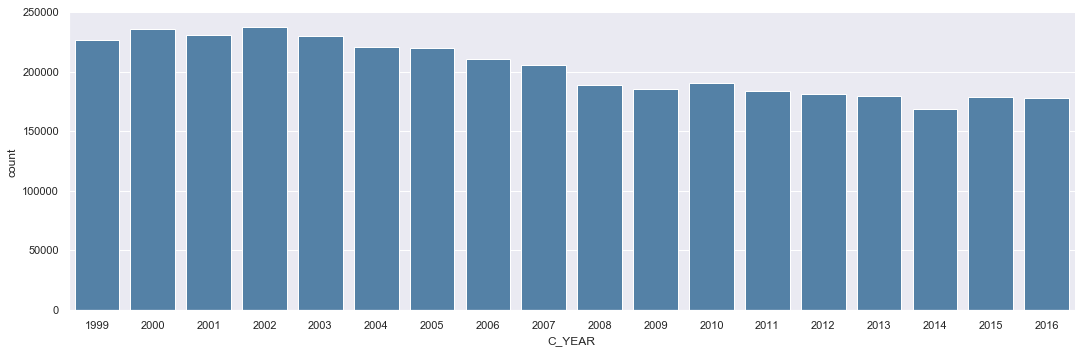

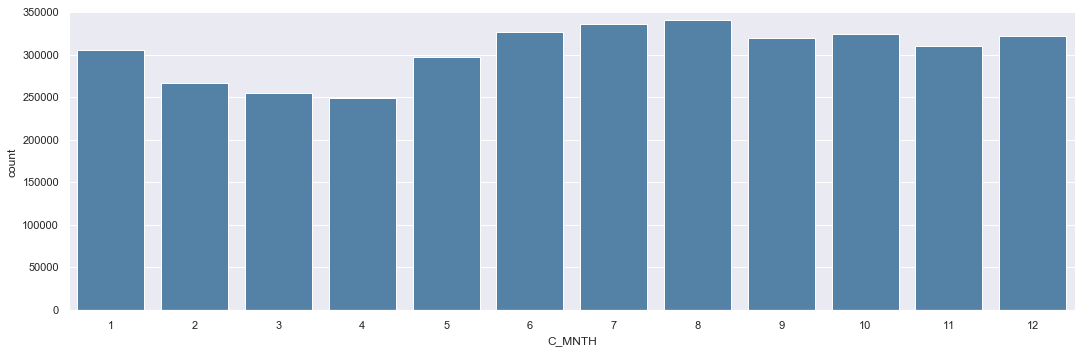

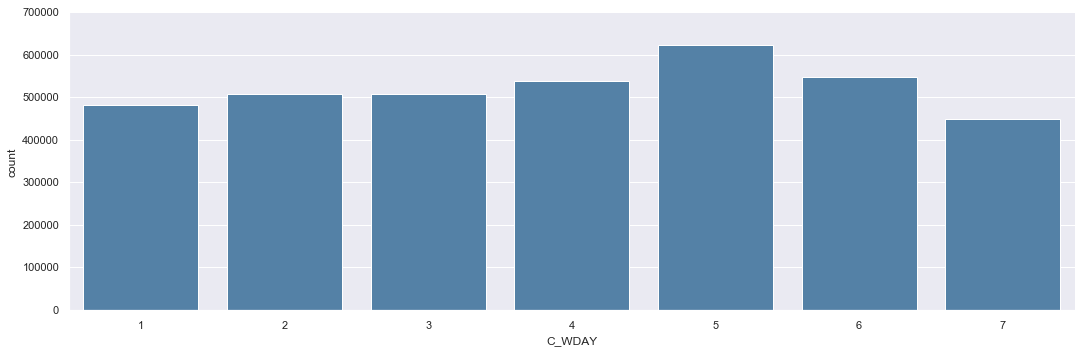

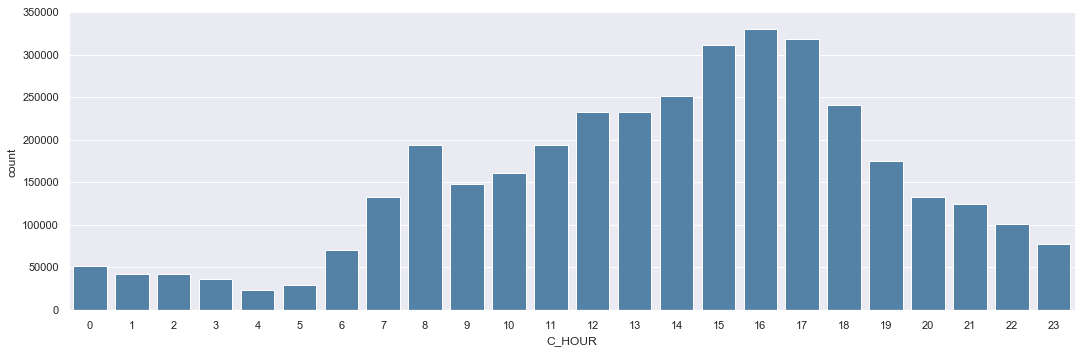

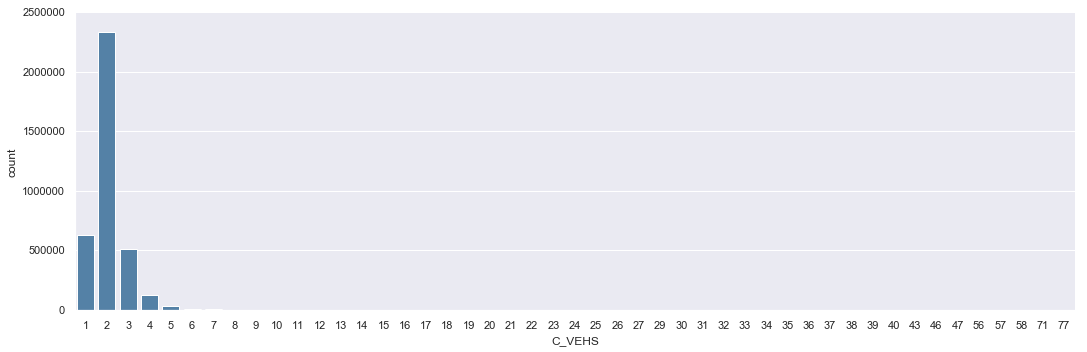

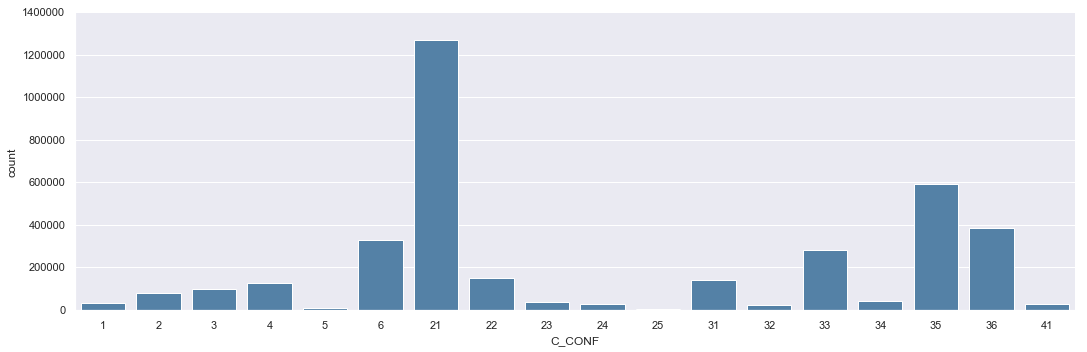

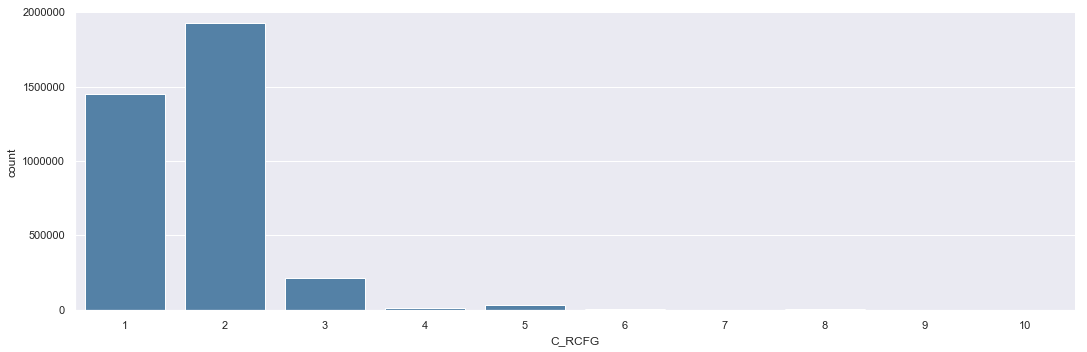

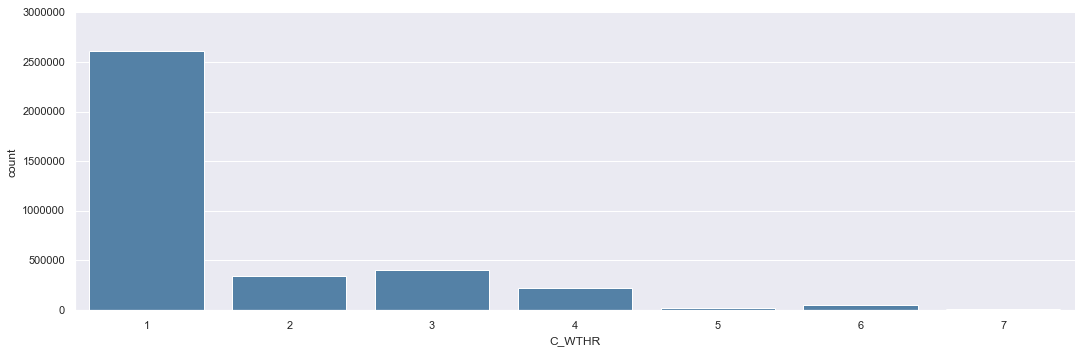

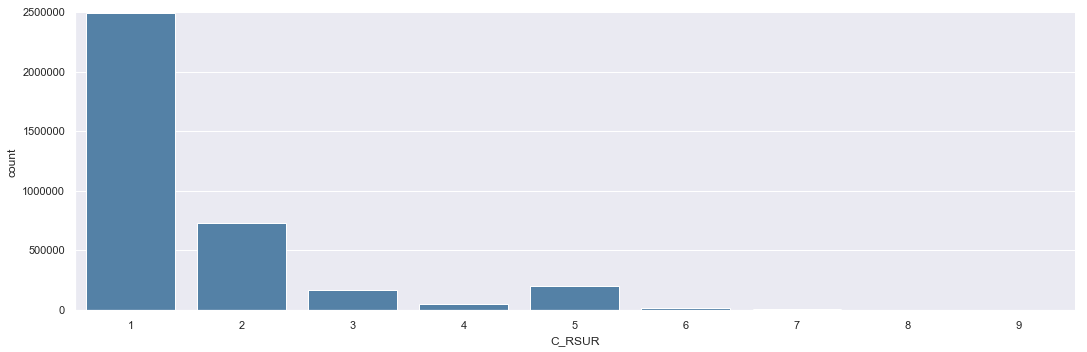

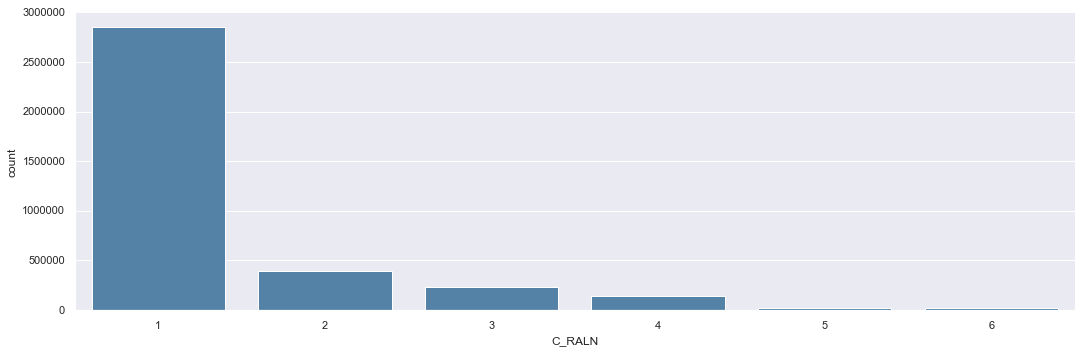

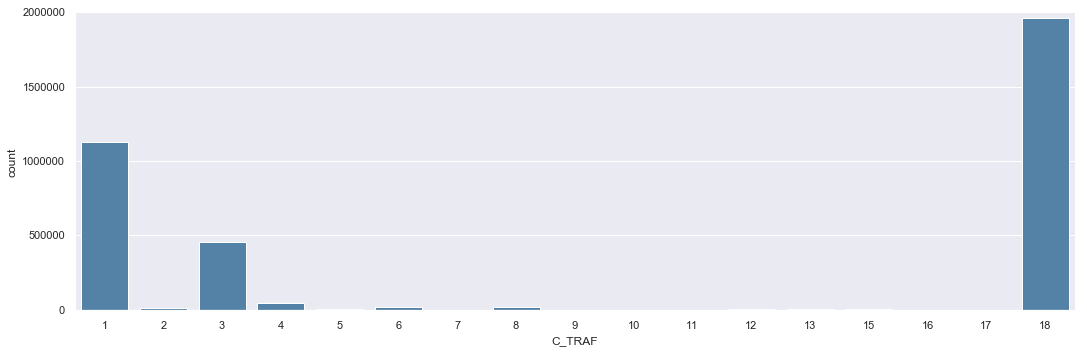

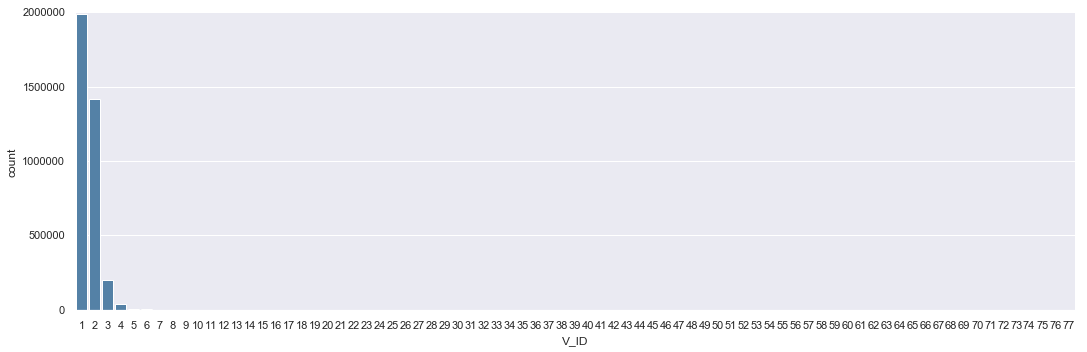

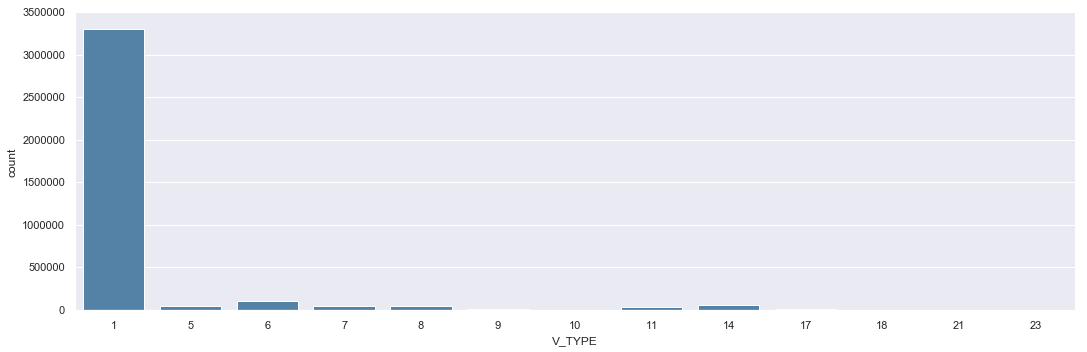

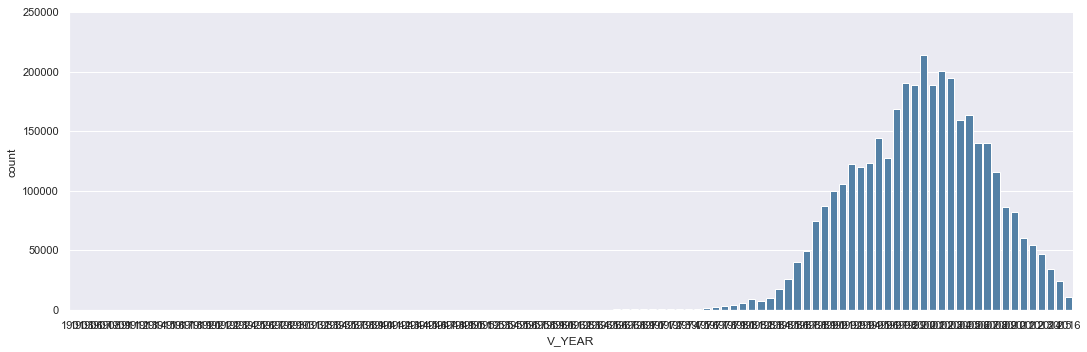

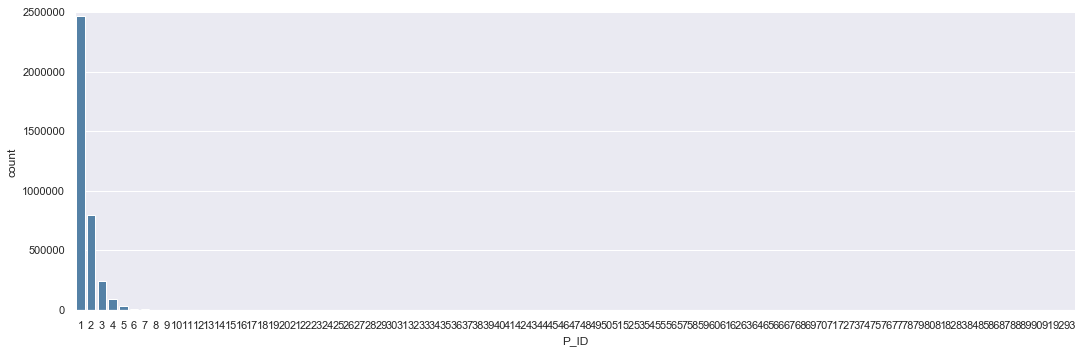

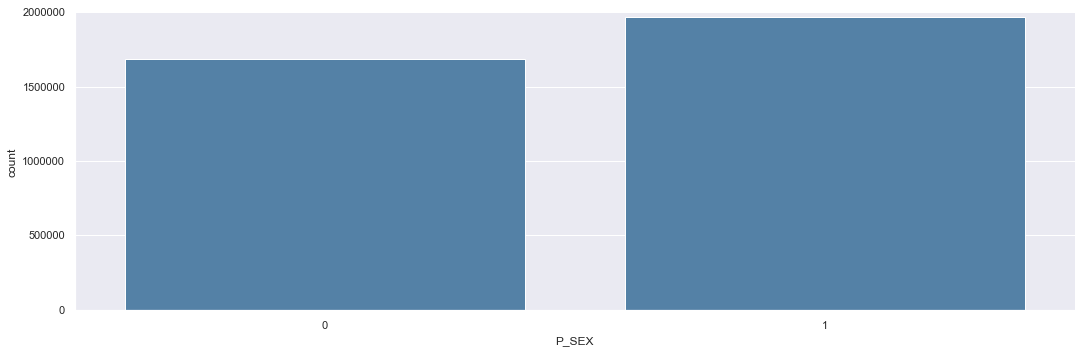

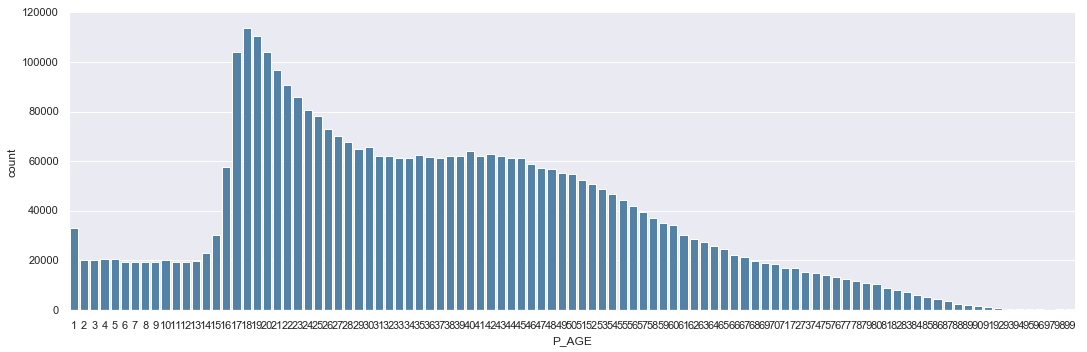

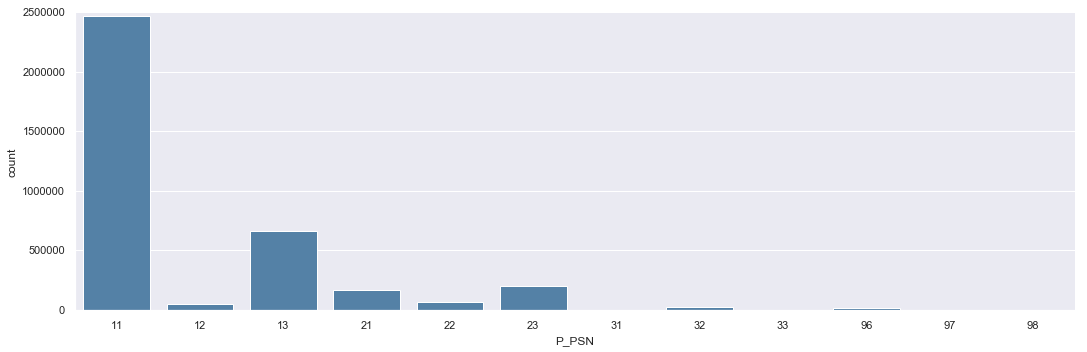

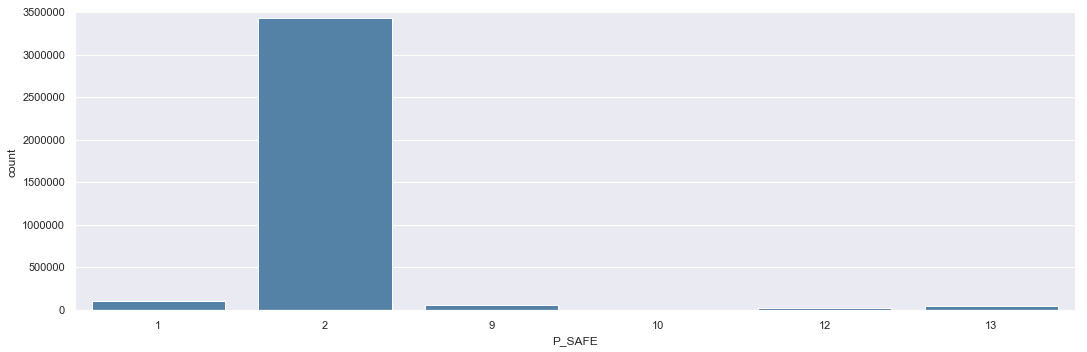

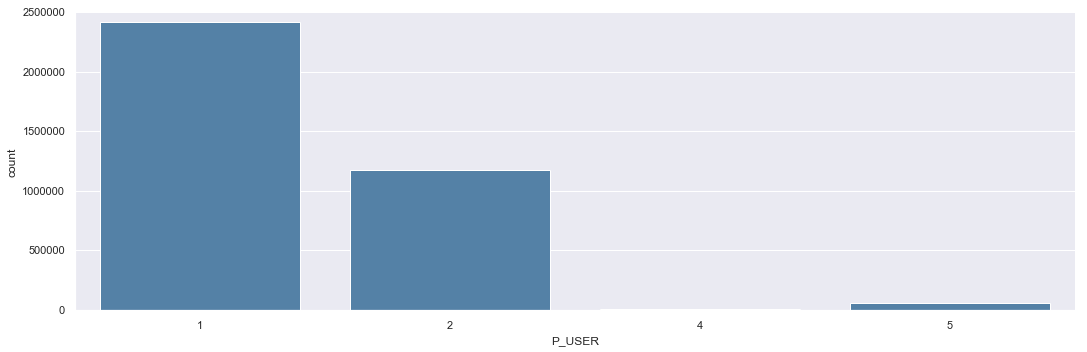

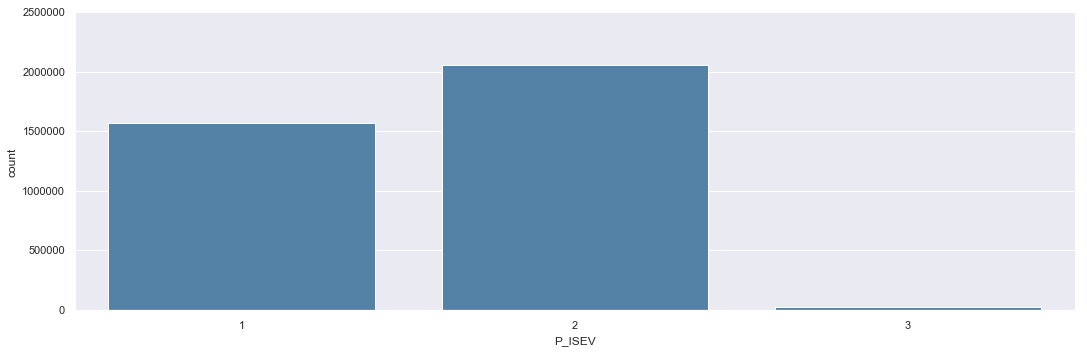

In [24]:
#for i in df.columns:
#    sns.distplot(df[i], kde=False)

%matplotlib inline

#with sns.axes_style('white'):
for col in df.columns:
    g = sns.catplot(col, data=df, aspect=3, kind="count", color='steelblue', height=5)
    g.set_xticklabels(step=1)

#(g.set_axis_labels("", "Survival Rate")
#    ...   .set_xticklabels(["Men", "Women", "Children"])
#    ...   .set_titles("{col_name} {col_var}")
#    ...   .set(ylim=(0, 1))

### Box Plot

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


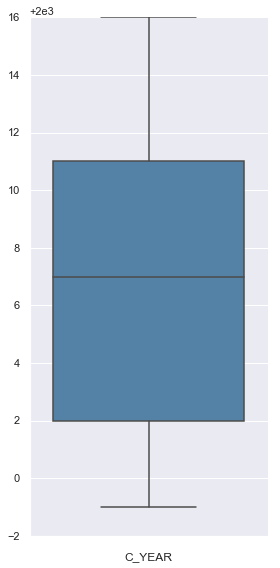

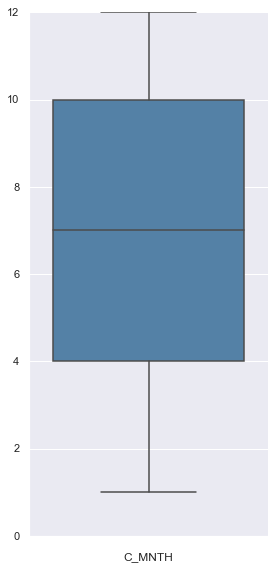

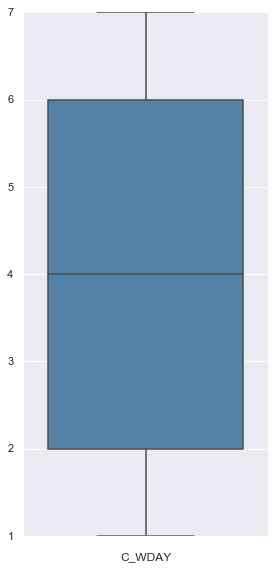

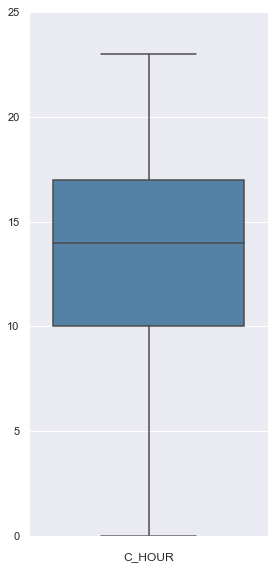

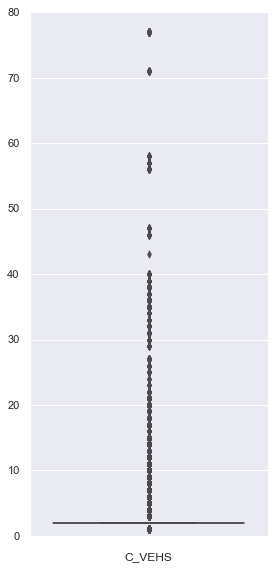

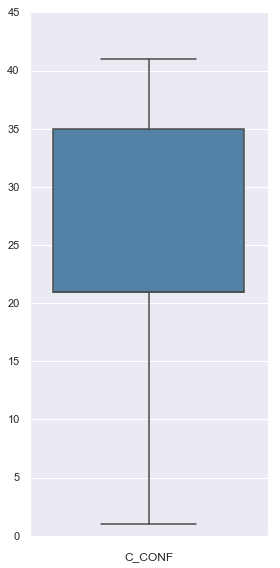

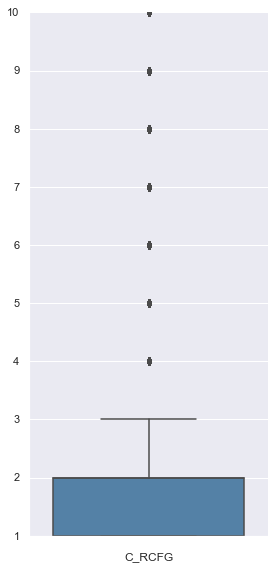

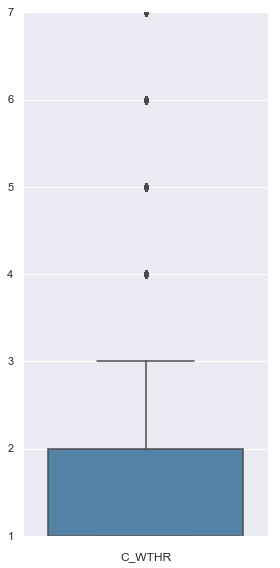

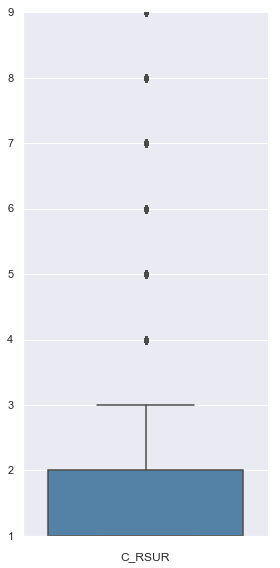

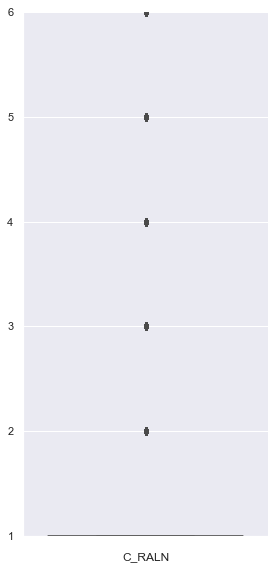

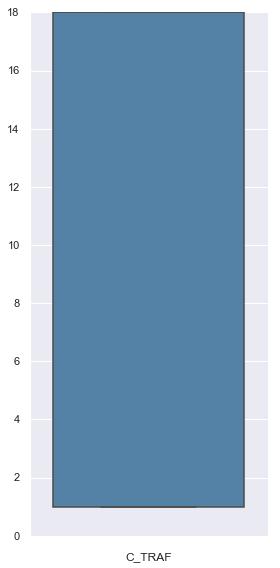

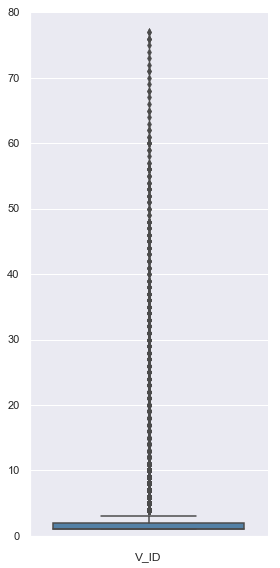

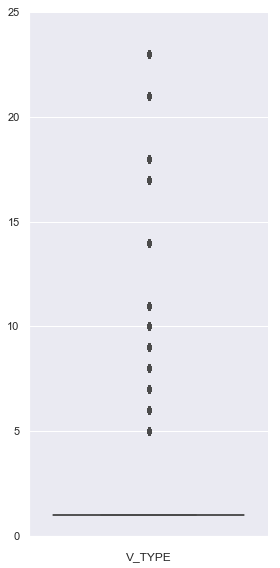

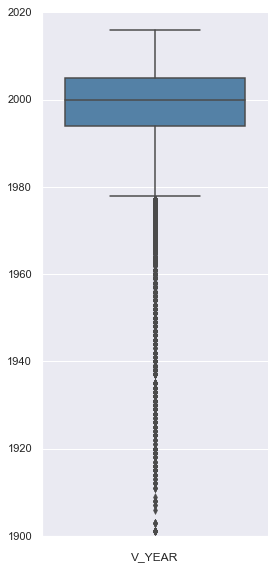

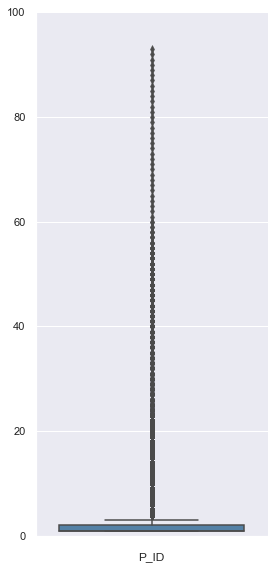

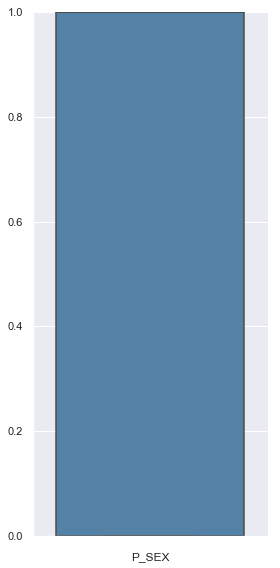

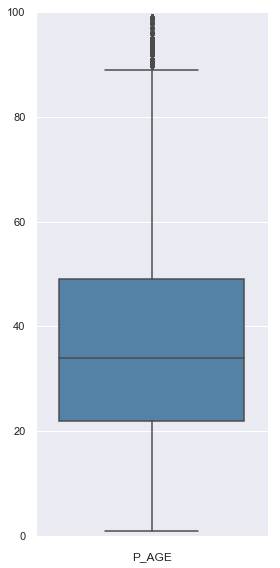

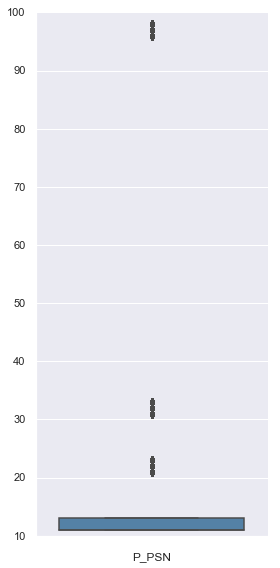

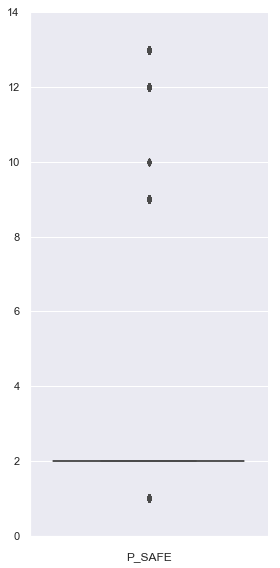

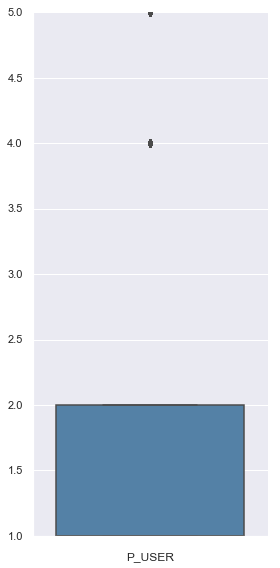

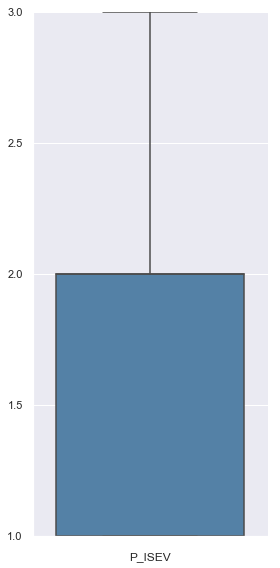

In [25]:
for col in df.columns:
    g = sns.catplot(col, data=df, aspect=0.5, height=8, kind="box", orient="v", color='steelblue')
    g.set_xticklabels(step=1)